In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('output2.csv', encoding="utf-8", delimiter=",")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,1.000000,0.731707,0.640488,0.817561,0.865854,0.608293,0.688780,0.608293,0.688780,...,0.919512,0.0,0.0,0.0,0.0,0.597561,0.935610,1.0,0.463415,NaN
1,0.940488,0.933659,0.681951,0.607317,0.771707,0.781463,0.580488,0.739512,0.580488,0.739512,...,0.882439,0.0,0.0,0.0,0.0,0.596098,0.934146,1.0,0.564390,NaN
2,0.660976,0.591220,0.784878,0.760488,0.759512,0.740488,0.520976,0.834634,0.520976,0.834634,...,0.942439,0.0,0.0,0.0,0.0,0.924878,0.933171,1.0,0.601463,
3,0.641463,0.621951,0.805366,0.751707,0.760488,0.725366,0.482927,0.878537,0.482927,0.878537,...,0.902927,0.0,0.0,0.0,0.0,0.596098,0.909268,1.0,0.587317,NaN
4,0.569756,0.719024,0.722927,0.701951,0.755122,0.766341,0.667317,0.935610,0.667317,0.935610,...,0.910732,0.0,0.0,0.0,0.0,0.507317,0.893171,1.0,0.554634,NaN


In [66]:
del df['22']

In [67]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,1.000000,0.731707,0.640488,0.817561,0.865854,0.608293,0.688780,0.608293,0.688780,...,1.0,0.919512,0.0,0.0,0.0,0.0,0.597561,0.935610,1.0,0.463415
1,0.940488,0.933659,0.681951,0.607317,0.771707,0.781463,0.580488,0.739512,0.580488,0.739512,...,1.0,0.882439,0.0,0.0,0.0,0.0,0.596098,0.934146,1.0,0.564390
2,0.660976,0.591220,0.784878,0.760488,0.759512,0.740488,0.520976,0.834634,0.520976,0.834634,...,1.0,0.942439,0.0,0.0,0.0,0.0,0.924878,0.933171,1.0,0.601463
3,0.641463,0.621951,0.805366,0.751707,0.760488,0.725366,0.482927,0.878537,0.482927,0.878537,...,1.0,0.902927,0.0,0.0,0.0,0.0,0.596098,0.909268,1.0,0.587317
4,0.569756,0.719024,0.722927,0.701951,0.755122,0.766341,0.667317,0.935610,0.667317,0.935610,...,1.0,0.910732,0.0,0.0,0.0,0.0,0.507317,0.893171,1.0,0.554634


In [68]:
df2 = df.copy()

In [69]:
df2.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,1.000000,0.731707,0.640488,0.817561,0.865854,0.608293,0.688780,0.608293,0.688780,...,1.0,0.919512,0.0,0.0,0.0,0.0,0.597561,0.935610,1.0,0.463415
1,0.940488,0.933659,0.681951,0.607317,0.771707,0.781463,0.580488,0.739512,0.580488,0.739512,...,1.0,0.882439,0.0,0.0,0.0,0.0,0.596098,0.934146,1.0,0.564390
2,0.660976,0.591220,0.784878,0.760488,0.759512,0.740488,0.520976,0.834634,0.520976,0.834634,...,1.0,0.942439,0.0,0.0,0.0,0.0,0.924878,0.933171,1.0,0.601463
3,0.641463,0.621951,0.805366,0.751707,0.760488,0.725366,0.482927,0.878537,0.482927,0.878537,...,1.0,0.902927,0.0,0.0,0.0,0.0,0.596098,0.909268,1.0,0.587317
4,0.569756,0.719024,0.722927,0.701951,0.755122,0.766341,0.667317,0.935610,0.667317,0.935610,...,1.0,0.910732,0.0,0.0,0.0,0.0,0.507317,0.893171,1.0,0.554634


In [70]:
dfNew = pd.DataFrame(columns=('singleJaccard', 'Jaccard', 'type'))

In [71]:
for column in df2:
     dfNew.loc[column] = df2[column].mean(),df2[column].mean(),df2[column].mean()


In [72]:
df = pd.read_csv('output3.csv', encoding="utf-8", delimiter=",")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,1.000000,0.719512,0.624146,0.809268,0.859756,0.590488,0.674634,0.590488,0.674634,...,0.915854,0.0,0.0,0.0,0.0,0.579268,0.932683,1.0,0.439024,NaN
1,0.925610,0.917073,0.666098,0.587073,0.758537,0.766341,0.561220,0.729268,0.561220,0.729268,...,0.878293,0.0,0.0,0.0,0.0,0.596098,0.929756,1.0,0.540000,NaN
2,0.640976,0.574634,0.769512,0.743415,0.746585,0.728293,0.504390,0.825122,0.504390,0.825122,...,0.936829,0.0,0.0,0.0,0.0,0.906098,0.928537,1.0,0.584146,NaN
3,0.623171,0.603171,0.795122,0.739024,0.750000,0.714878,0.463415,0.869024,0.463415,0.869024,...,0.897317,0.0,0.0,0.0,0.0,0.596098,0.906341,1.0,0.587317,NaN
4,0.550000,0.703659,0.708537,0.685610,0.744390,0.752927,0.652195,0.932683,0.652195,0.932683,...,0.907073,0.0,0.0,0.0,0.0,0.485122,0.887317,1.0,0.534390,NaN


In [73]:
del df['22']

In [74]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.446414,0.479184,0.505534,0.438274,0.609674,0.635307,0.389250,0.766857,0.353127,0.744976,...,0.842877,0.829062,0.006178,0.017382,0.003620,0.039883,0.511665,0.872907,0.414556,0.450800
std,0.190201,0.158200,0.164142,0.174631,0.104317,0.115799,0.241425,0.106142,0.235635,0.112076,...,0.097613,0.064475,0.049596,0.071474,0.036301,0.107962,0.265628,0.051054,0.334375,0.182235
min,0.155610,0.276829,0.194146,0.072439,0.350976,0.247073,0.024390,0.403659,0.015366,0.400732,...,0.578537,0.682195,0.000000,0.000000,0.000000,0.000000,0.082683,0.730976,0.000000,0.000000
25%,0.290976,0.356585,0.382683,0.303902,0.536585,0.550976,0.232439,0.705122,0.191707,0.679512,...,0.777561,0.787317,0.000000,0.000000,0.000000,0.000000,0.317561,0.839512,0.097561,0.333902
50%,0.404878,0.418293,0.475854,0.392927,0.590976,0.626098,0.343659,0.764390,0.294634,0.740244,...,0.821951,0.821707,0.000000,0.000000,0.000000,0.000000,0.499024,0.871220,0.426829,0.442683
75%,0.566829,0.603171,0.629024,0.587073,0.656585,0.723902,0.487317,0.822195,0.464390,0.808293,...,0.933171,0.870976,0.000000,0.000000,0.000000,0.000000,0.730732,0.910976,0.682927,0.540000
max,1.000000,1.000000,0.867073,0.863659,0.868293,0.901951,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.989512,0.439024,0.439024,0.451220,0.875610,1.000000,0.971707,1.000000,1.000000


In [87]:
for column in df2:
     dfNew.loc[column] = df[column].mean(),df2[column].mean(),df2[column].mean()

In [90]:
dfNew['type'] = "string"

In [91]:
dfNew

,singleJaccard,Jaccard,type
1,0.446414,0.461414,string
2,0.479184,0.493878,string
3,0.505534,0.519553,string
4,0.438274,0.453902,string
5,0.609674,0.620277,string
6,0.635307,0.645409,string
7,0.389250,0.405136,string
8,0.766857,0.774539,string
9,0.353127,0.370308,string
10,0.744976,0.753015,string


In [ ]:
df['type'] = 

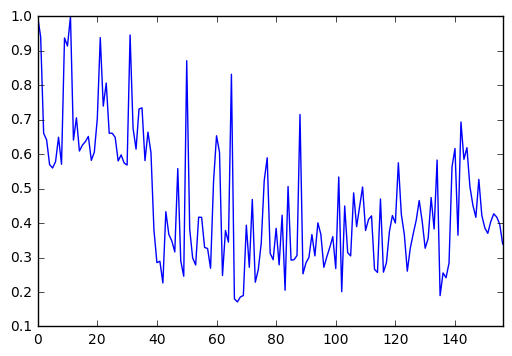

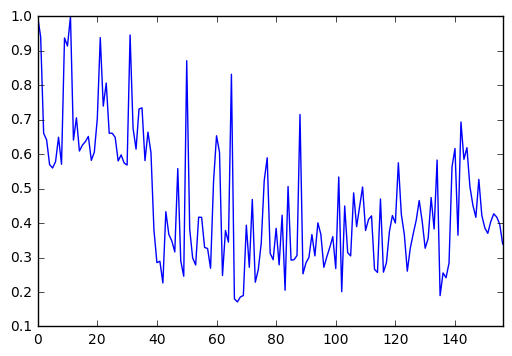

In [8]:
import pylab
pylab.show()

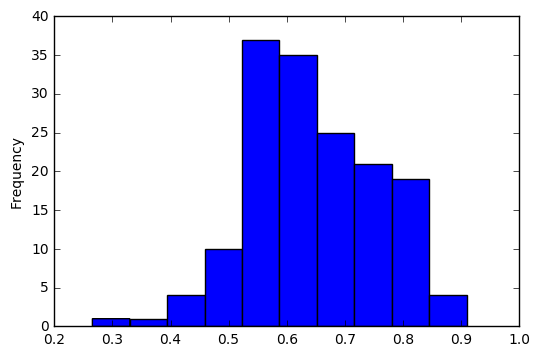

In [14]:
df.Tags.plot.hist()
pylab.show()

In [ ]:
string, string, string, string, string, string, string, string, string, string, string, string, date, date, date, date, string, string, string, string, string,penis